In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
data.shape

(768, 9)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### **Every column if of Int or Float data type so we can directly check the distribution of each numeric column**

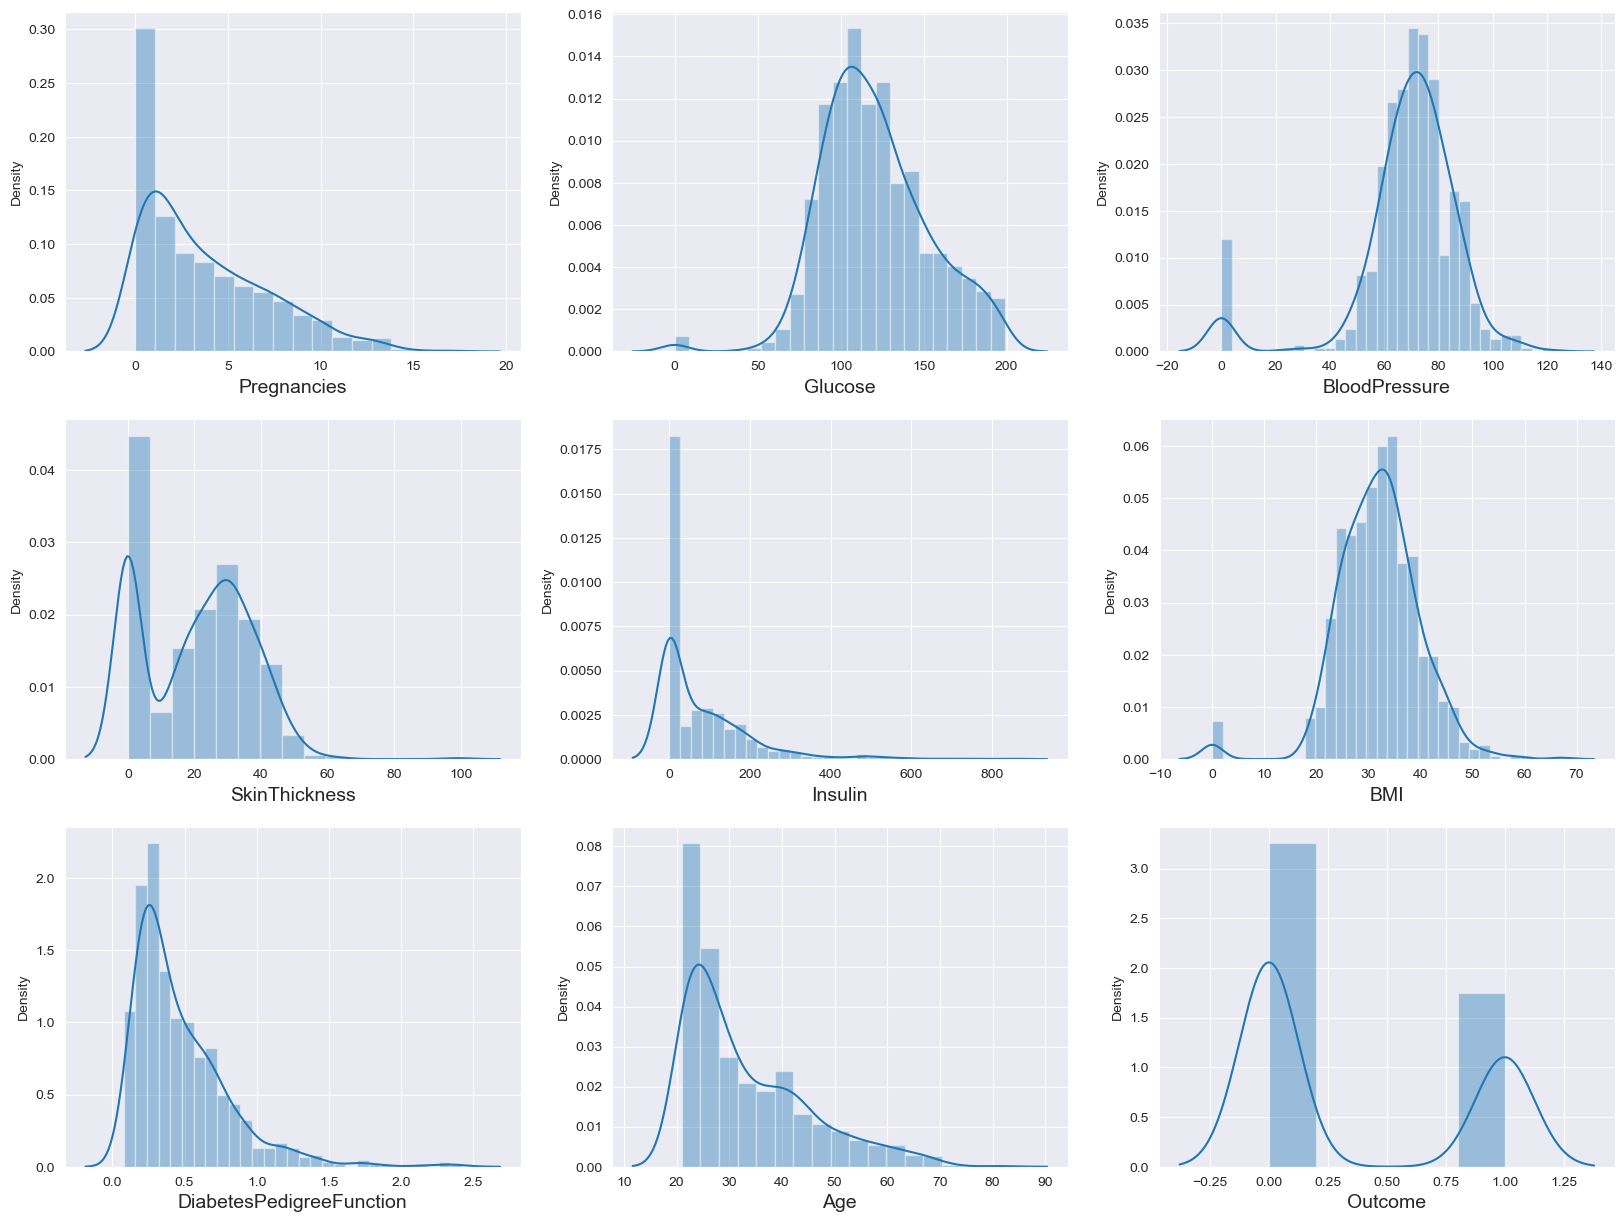

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize=(20, 15))

graph = 1

for column in data.columns:
    if graph <= len(data.columns):
        ax = plt.subplot(3, 3, graph)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 14)

    graph += 1
plt.show()

**Observations**
- As the above graphs shows there are some skewnes in the data.
- There are 0 values in columns like BloodPressure, Insulin, BMI, and Glucose which is not possible.
- So to handle these 0 values, we have to either remove that rows or replace 0 with mean or median of that column.

**Replace 0 with mean of that respective columns**

In [19]:
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

### **check the distribution of each column after replacing 0 in important columns**

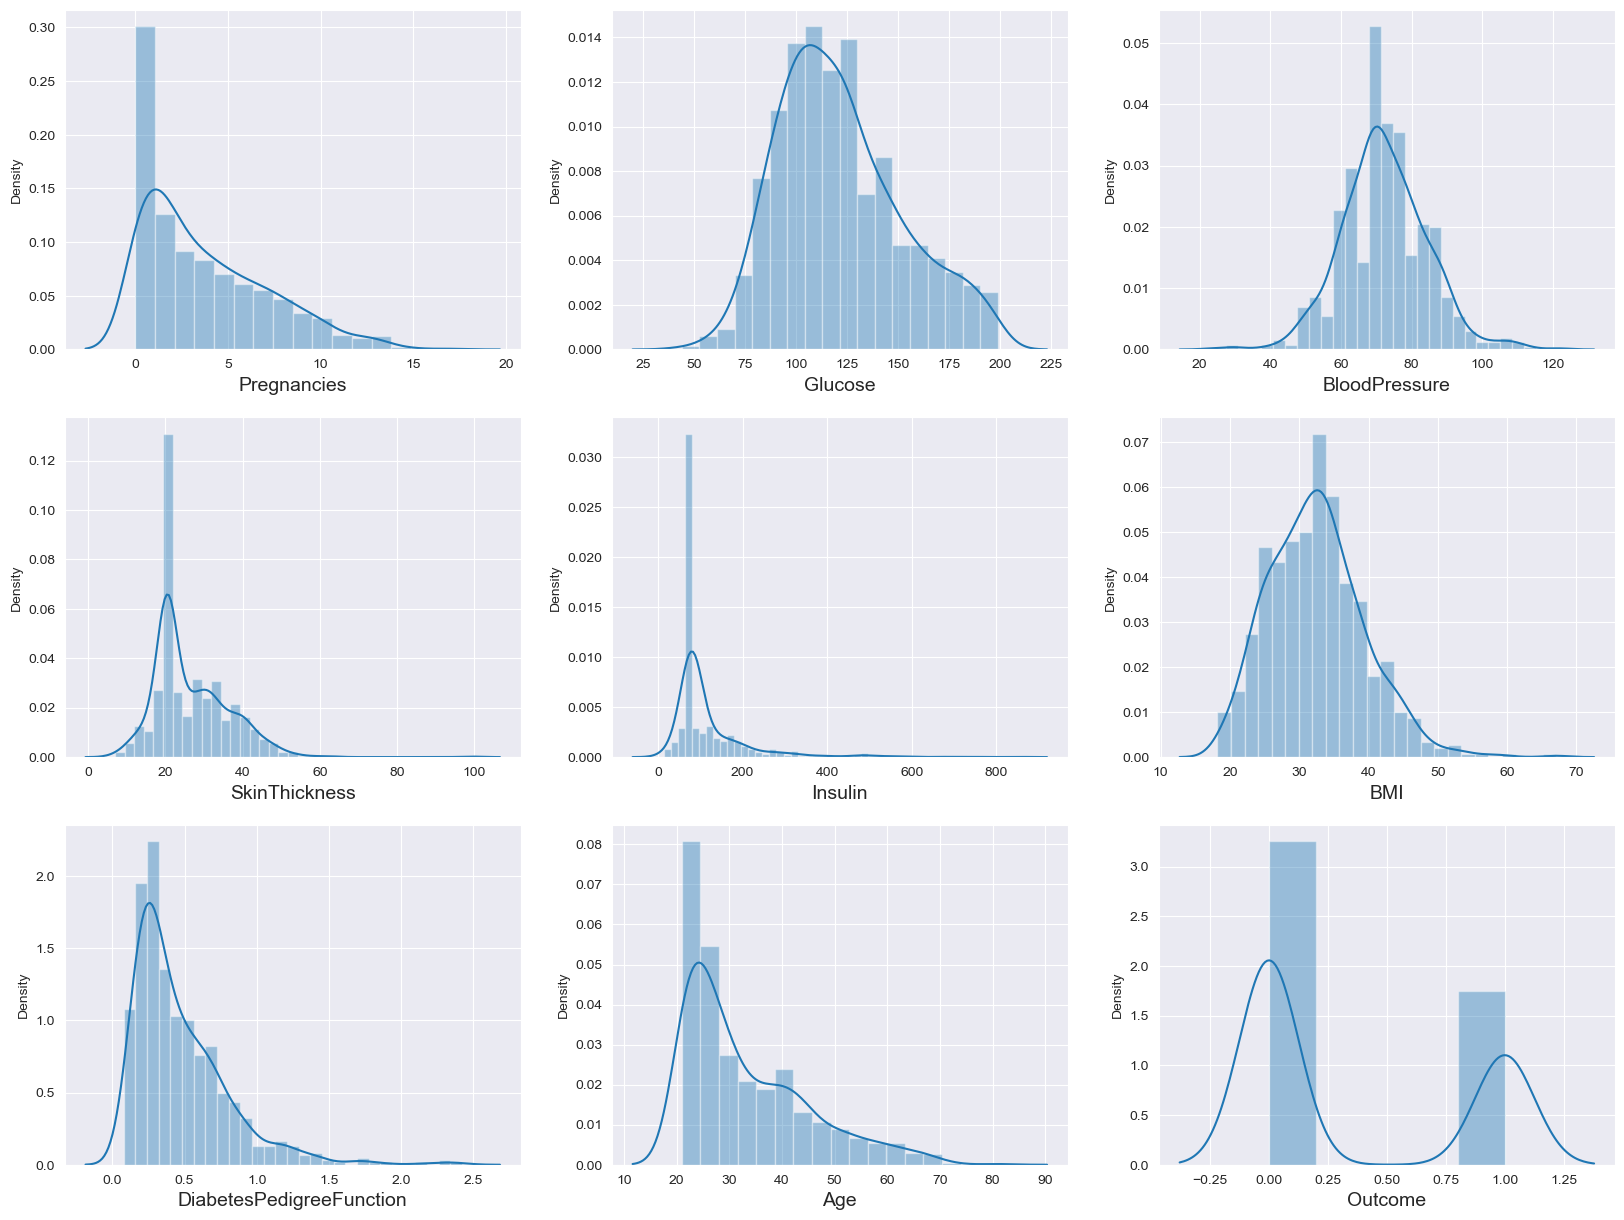

In [20]:
plt.figure(figsize=(20, 15))

graph = 1

for column in data.columns:
    if graph <= len(data.columns):
        ax = plt.subplot(3, 3, graph)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 14)

    graph += 1
plt.show()

**Obserations**
- After replacing 0 with mean of the columns the distribution of data looks close to normal.
- But some of the columns have outliers so their distribution is somewhat skewed like Age, Insulin, Pregnancies, DiabetesPedigreeFunction etc.

### **Check the outliers in each & every column using boxplot**

<Axes: >

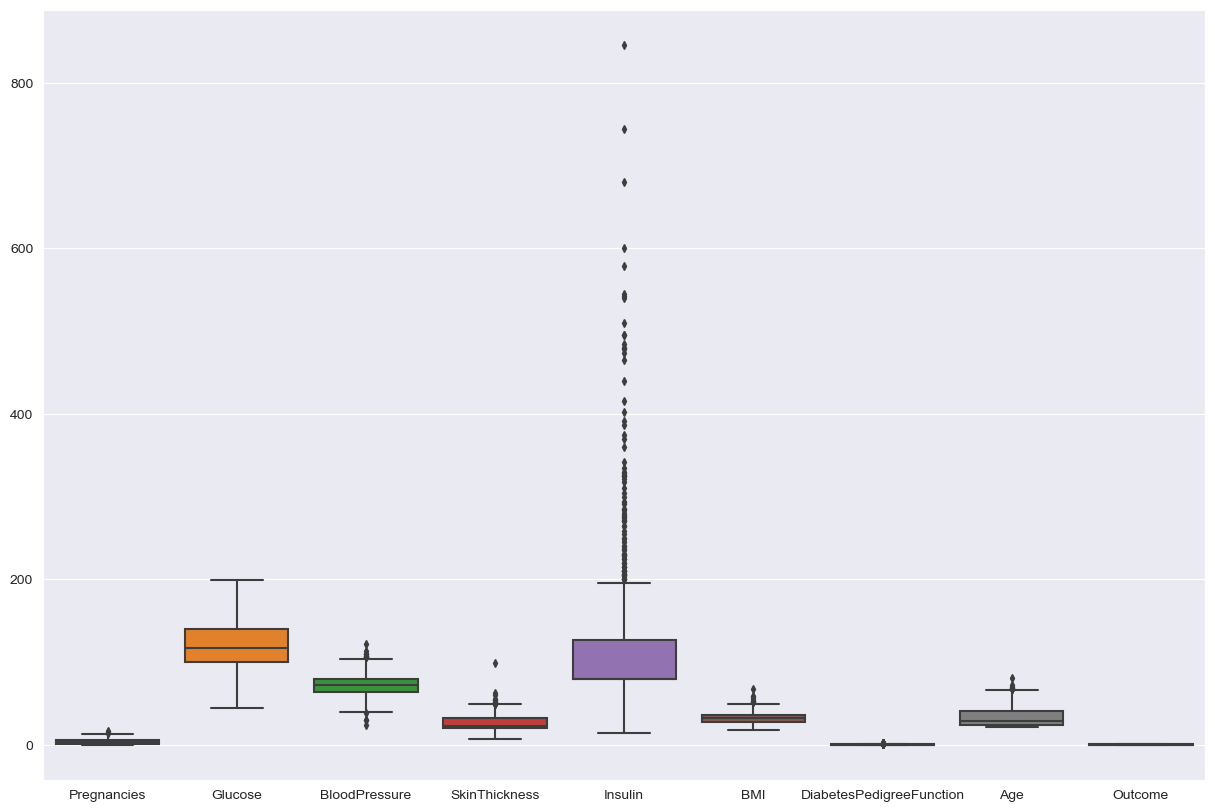

In [28]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data= data, width = 0.8, ax = ax, fliersize = 4)

**Observations**
- Pregnancies having not much dispersion from the mean
- Glucose is having no outliers
- Bloodpressure is having some outliers which we need to handle
- SkinThickness, Insulin, BMI, AGE are having outliers.

So whichever columns having less outleirs we can cosider directly 95 or 98 percentile of data from that columns
\
In our data we can consider Pregnancies, BMI for considering 98 percentile data from these columns

In [29]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### **first we will directly remove top 2 percentile of data assuming they are outliers and check the distribution**

In [32]:
pregnancies_q = data['Pregnancies'].quantile(0.99)
cleaned_data = data[data['Pregnancies'] < pregnancies_q]

BMI_q = data['BMI'].quantile(0.98)
cleaned_data = data[data['BMI'] < BMI_q]

Skinthickness_q = data['SkinThickness'].quantile(0.95)
cleaned_data = data[data['SkinThickness'] < Skinthickness_q]

insulin_q = data['Insulin'].quantile(0.95)
cleaned_data = data[data['Insulin'] < insulin_q]

DiabetesPedigreeFunction_q = data['DiabetesPedigreeFunction'].quantile(0.98)
cleaned_data = data[data['DiabetesPedigreeFunction'] < DiabetesPedigreeFunction_q]

Age_q = data['Age'].quantile(0.98)
cleaned_data = data[data['Age'] < Age_q]

In [35]:
cleaned_data.shape, data.shape

((752, 9), (768, 9))

<Axes: >

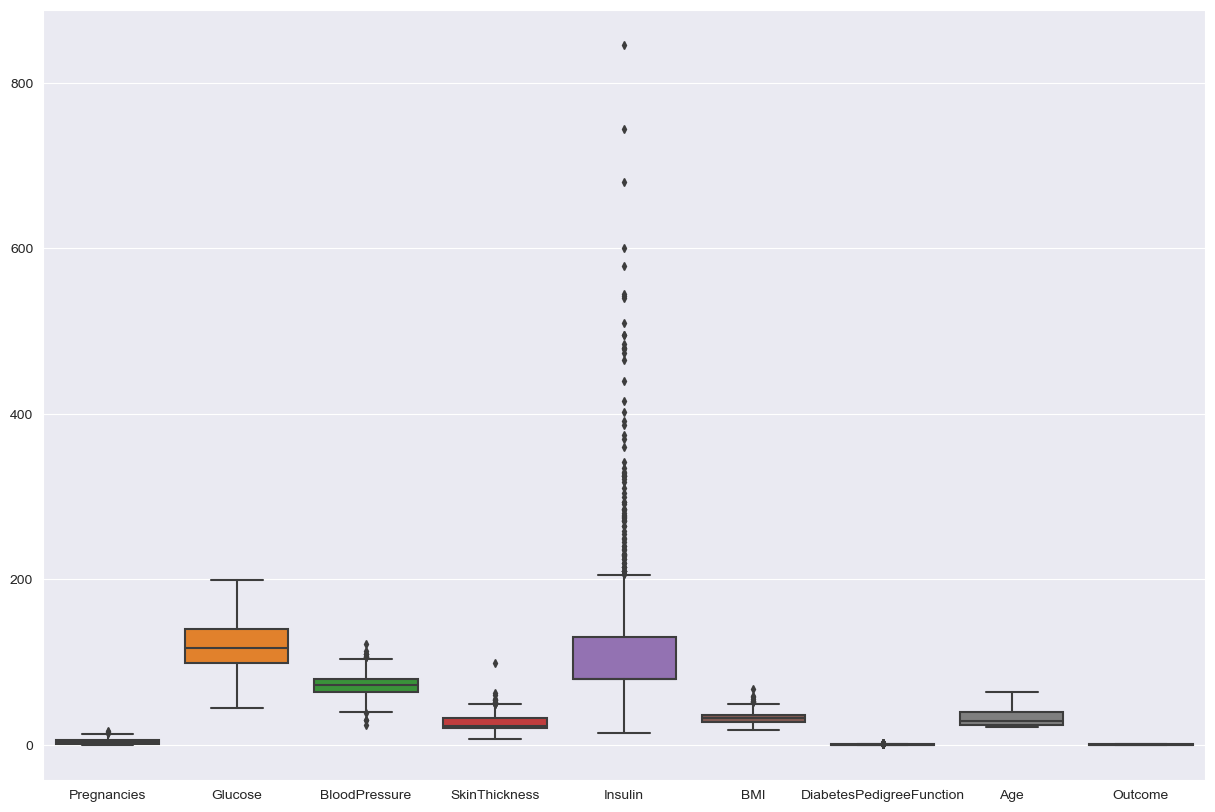

In [36]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data= cleaned_data, width = 0.8, ax = ax, fliersize = 4)

Still there are outliers in the data after removing top 2 percentile of data so now we will try the IQR method and try to remove outliers from each column.

In [37]:
def create_limits(df, column_name, q1, q3):
    Q1 = df[column_name].quantile(q1)
    Q3 = df[column_name].quantile(q3)

    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    return upper_limit, lower_limit 

In [40]:
pregnany_upper_limit, pregnancy_lower_limit = create_limits(data, 'Pregnancies', 0.25, 0.75)
BMI_upper_limit, BMI_lower_limit = create_limits(data, 'BMI', 0.25, 0.75)
SkinThickness_upper_limit, SkinThickness_lower_limit = create_limits(data, 'SkinThickness', 0.25, 0.75)
Insulin_upper_limit, Insulin_lower_limit = create_limits(data, 'Insulin', 0.25, 0.75)
DiabetesPedigreeFunction_upper_limit , DiabetesPedigreeFunction_lower_limit = create_limits(data, 'DiabetesPedigreeFunction', 0.25, 0.75) 
Age_upper_limits, Age_lower_limit =  create_limits(data, 'Age', 0.25, 0.75) 

In [43]:
print(f"The upper limit for pregnancy is {round(pregnany_upper_limit, 2)} and lower limit is {round(pregnancy_lower_limit, 2)}")
print(f"The upper limit for BMI is {round(BMI_upper_limit, 2)} and lower limit is {round(BMI_lower_limit, 2)}")
print(f"The upper limit for Skin thickness is {round(SkinThickness_upper_limit, 2)} and lower limit is {round(SkinThickness_lower_limit, 2)}")
print(f"The upper limit for Insulin is {round(Insulin_upper_limit, 2)} and lower limit is {round(Insulin_lower_limit,2)}")
print(f"The upper limit for Diabetes Pedigree function is {round(DiabetesPedigreeFunction_upper_limit, 2)} and lower limit is {round(DiabetesPedigreeFunction_lower_limit, 2)}")
print(f"The upper limit for Age is {round(Age_upper_limits, 2)} and lower limit is {round(Age_lower_limit, 2)}")

The upper limit for pregnancy is 13.5 and lower limit is -6.5
The upper limit for BMI is 50.25 and lower limit is 13.85
The upper limit for Skin thickness is 49.2 and lower limit is 3.34
The upper limit for Insulin is 198.43 and lower limit is 8.62
The upper limit for Diabetes Pedigree function is 1.2 and lower limit is -0.33
The upper limit for Age is 66.5 and lower limit is -1.5


In [53]:
new_data = data[(data['Pregnancies'] < pregnany_upper_limit) & (data['Pregnancies'] >= pregnancy_lower_limit)]
new_data = data[(data['BMI'] < BMI_upper_limit) & (data['BMI'] >= BMI_lower_limit)]
new_data = data[(data['SkinThickness'] < SkinThickness_upper_limit) & (data['SkinThickness'] >= SkinThickness_lower_limit)]
new_data = data[(data['Insulin'] < Insulin_upper_limit) & (data['Insulin'] >= Insulin_lower_limit)]
new_data = data[(data['DiabetesPedigreeFunction'] < DiabetesPedigreeFunction_upper_limit) & (data['DiabetesPedigreeFunction'] >= DiabetesPedigreeFunction_lower_limit)]
new_data = data[(data['Age'] < Age_upper_limits) & (data['Age'] >= Age_lower_limit)]

In [54]:
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


<Axes: >

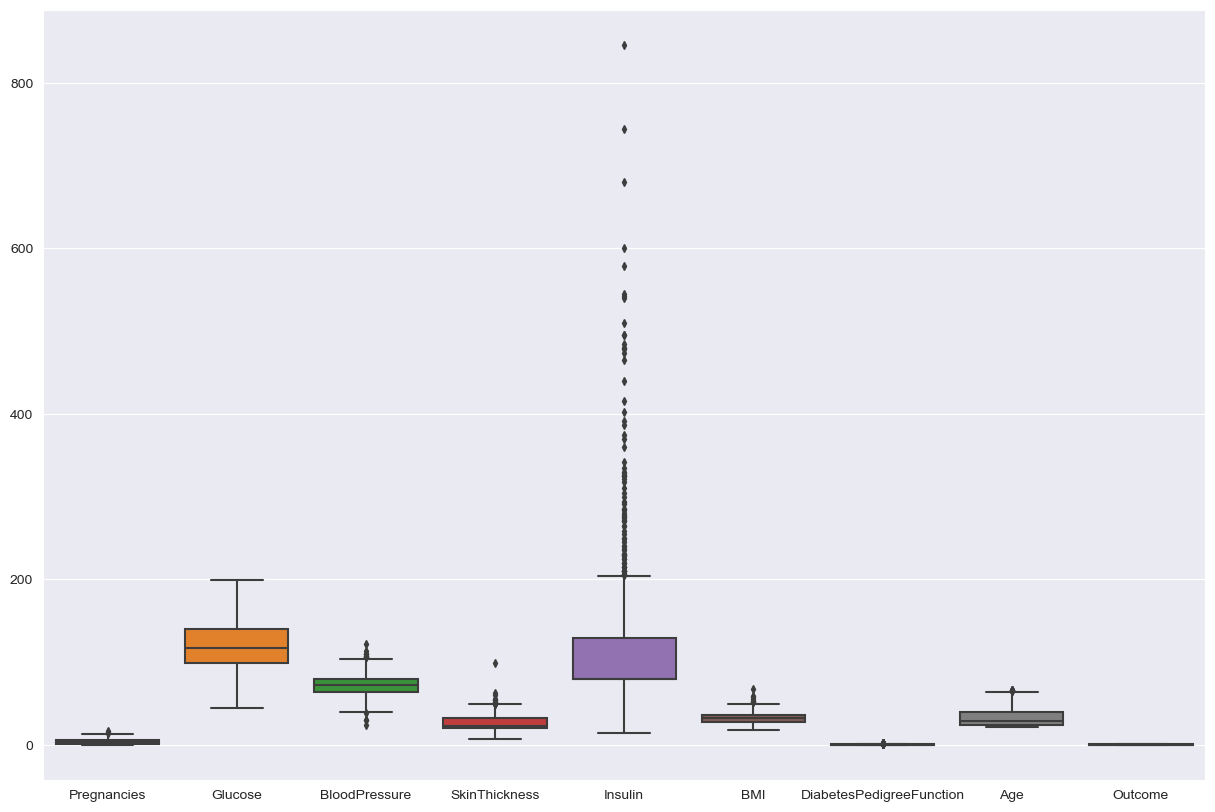

In [55]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data= new_data, width = 0.8, ax = ax, fliersize = 4)

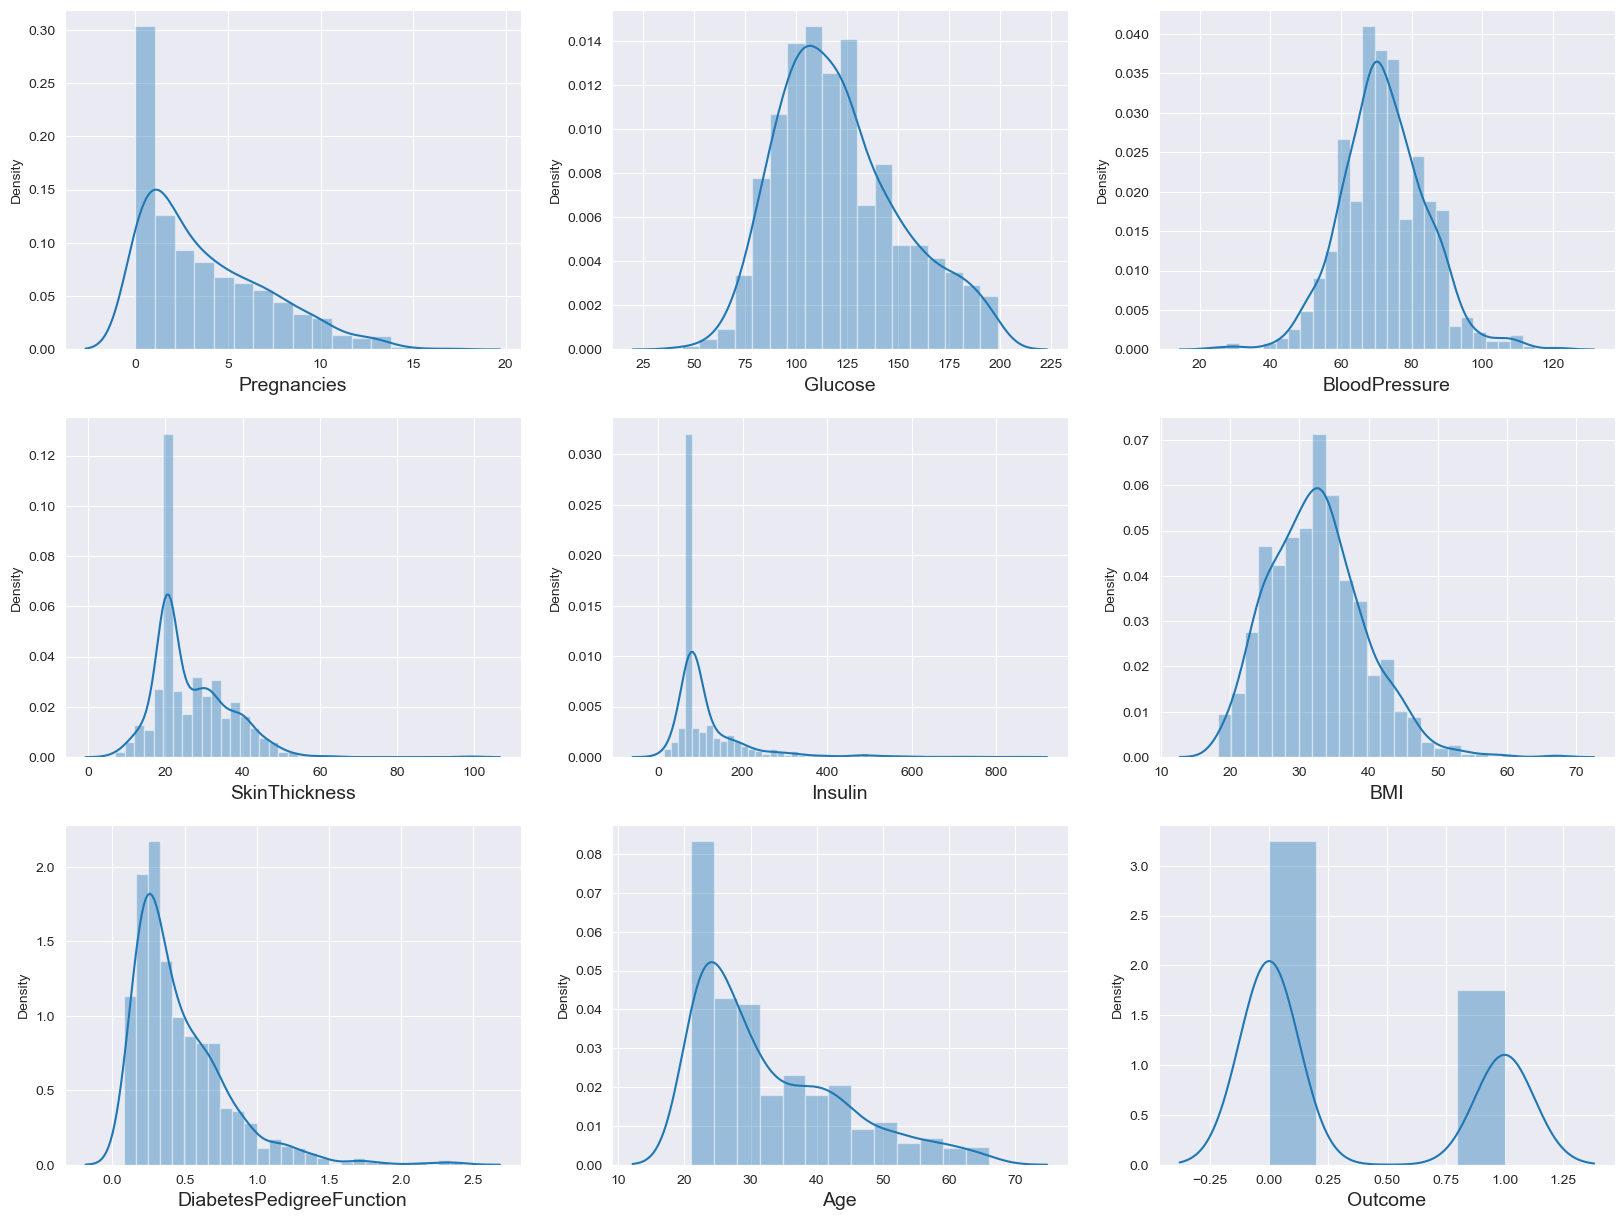

In [56]:
plt.figure(figsize=(20, 15))

graph = 1

for column in  new_data.columns:
    if graph <= len(new_data.columns):
        ax = plt.subplot(3, 3, graph)
        sns.distplot(new_data[column])
        plt.xlabel(column, fontsize = 14)

    graph += 1
plt.show()

So now we can see the variable distriution is almost close to Normal and now we can perform model training on the dataset.

In [61]:
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [64]:
X = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1]

In [65]:
X.shape, y.shape

((759, 8), (759,))

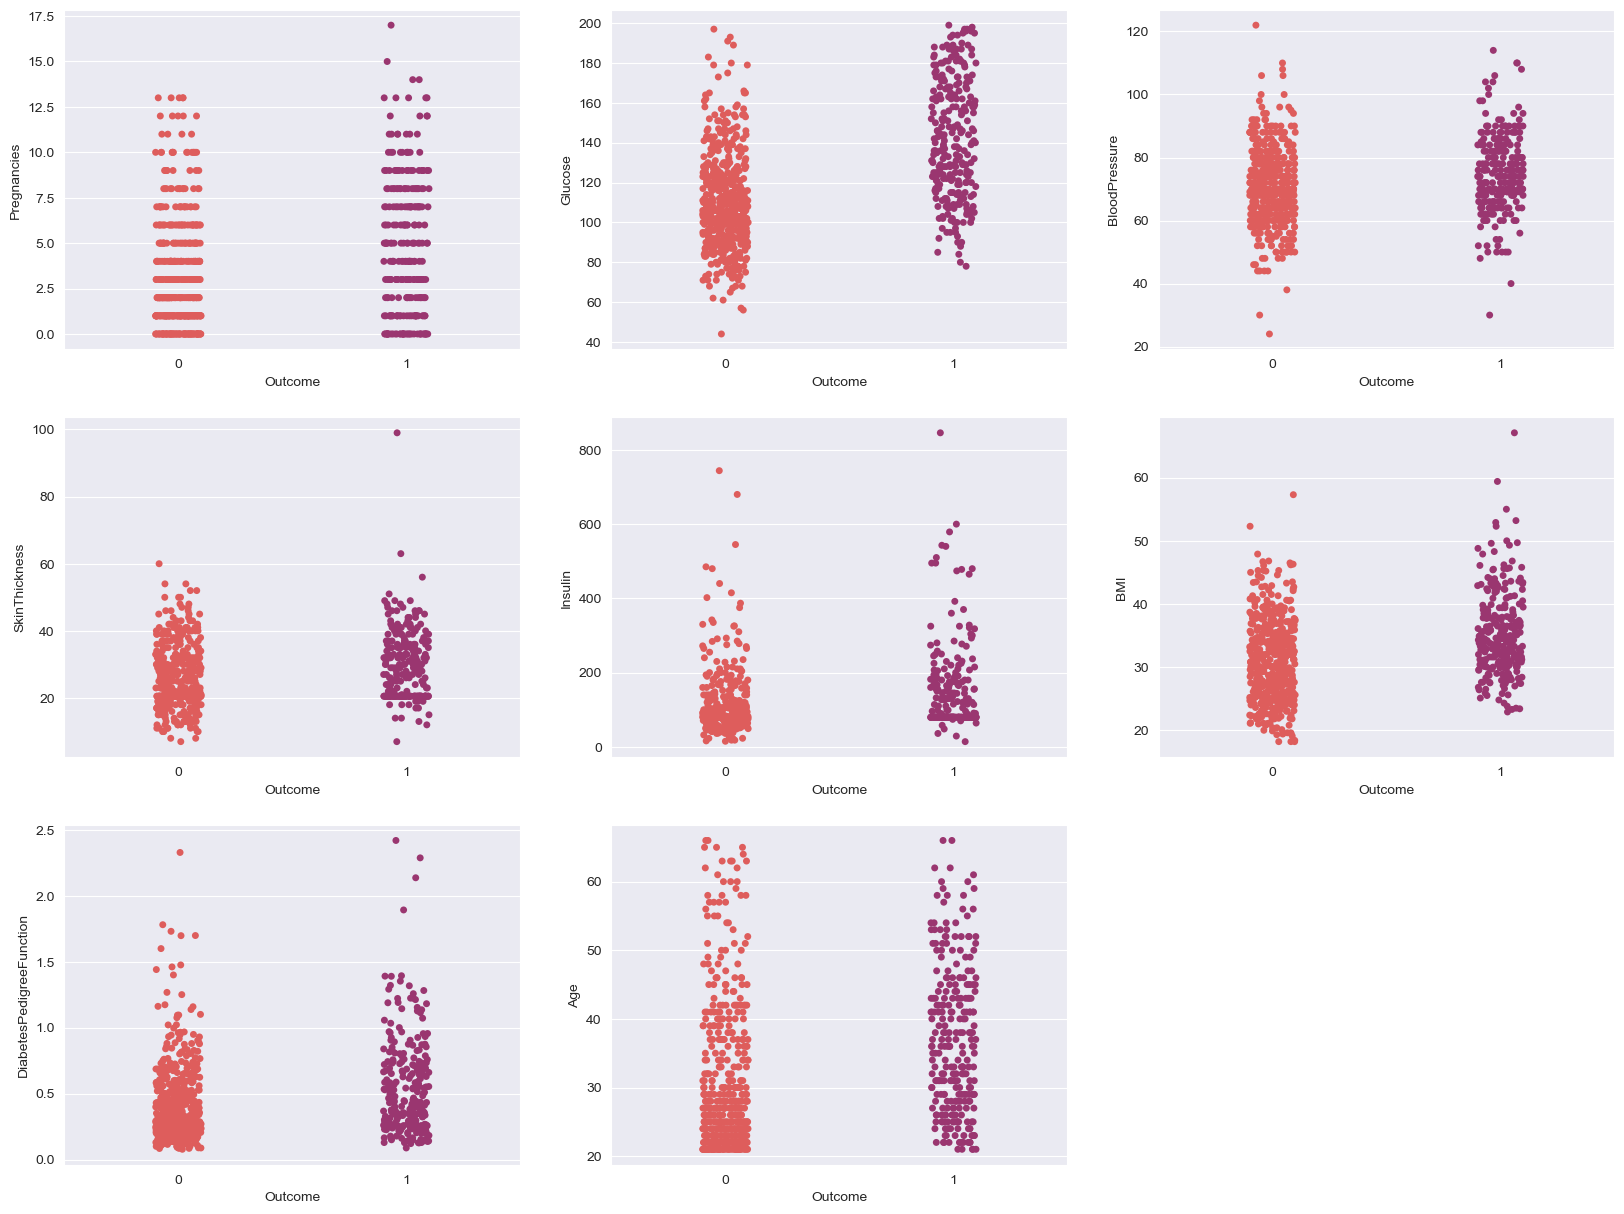

In [76]:
plt.figure(figsize=(20, 15))

graph = 1

for column in  X:
    if graph <= len(X.columns):
        ax = plt.subplot(3, 3, graph)
        sns.stripplot(x = y,y = X[column], palette = "flare")

    graph += 1
plt.show()

This stripplot() gives us the idea of the dispersion in X data i.e. independent data with respect to y i.e. dependent variable.
- So if we can see the 1st graph there we have given the dispersion of pregnancies with repspect to Diabetes yes or No

In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.64327075,  0.87008298, -0.01698412, ...,  0.16090077,
         0.46879263,  1.54828125],
       [-0.83984741, -1.20656984, -0.51093456, ..., -0.85816238,
        -0.36177415, -0.16252742],
       [ 1.23651801,  2.02377899, -0.6755847 , ..., -1.33857787,
         0.60421113, -0.07248486],
       ...,
       [ 0.34664712, -0.01991109, -0.01698412, ..., -0.91639456,
        -0.68075995, -0.25256998],
       [-0.83984741,  0.14490263, -1.00488499, ..., -0.3486308 ,
        -0.36779275,  1.27815356],
       [-0.83984741, -0.9428679 , -0.18163427, ..., -0.30495667,
        -0.47010895, -0.88286791]])

Now we have done scaling of the X data using Standard normal distribution i.e. Standard Scaler.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((569, 8), (190, 8), (569,), (190,))

In [81]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [108]:
y_pred = logistic.predict(X_test)
y_train_pred = logistic.predict(X_train)

print(f"The accuracy score for test dataset is: {accuracy_score(y_test, y_pred)}")
print(f"The accuracy score for training dataset is: {accuracy_score(y_train, y_train_pred)}")
print(f"The confusion matrix is: \n {confusion_matrix(y_test, y_pred)}")

The accuracy score for test dataset is: 0.8105263157894737
The accuracy score for training dataset is: 0.7644991212653779
The confusion matrix is: 
 [[112  15]
 [ 21  42]]


In [98]:
True_positive = confusion_matrix(y_test, y_pred)[0][0]
True_negative = confusion_matrix(y_test, y_pred)[1][1]
False_positive = confusion_matrix(y_test, y_pred)[0][1]
False_negative = confusion_matrix(y_test, y_pred)[1][0]

print(f"True positive is: {True_positive}")
print(f"True negative is: {True_negative}")
print(f"False positive is: {False_positive}")
print(f"False negative is: {False_negative}")

True positive is: 112
True negative is: 42
False positive is: 15
False negative is: 21


In [104]:
acc_score = (True_positive + True_negative) / (True_positive + True_negative + False_positive + False_negative)
Precision = True_positive / True_positive + False_positive
Recall = True_positive / True_positive + False_negative
F1_score = 2 * (Precision * Recall) / (Precision + Recall)

print(f"The manual accuracy score is: {acc_score}")
print(f"The precision is: {Precision}")
print(f"The recall is: {Recall}")
print(f"The F-1 score is: {F1_score}")

The manual accuracy score is: 0.8105263157894737
The precision is: 16.0
The recall is: 22.0
The F-1 score is: 18.526315789473685


### **Model pickling**

The pickle file is used to save the mathematical computation of our model in the .pkl file.
so that whenever we will give input to our pickle file it will give us a output based on our trained model.

In [105]:
import pickle

with open("logistic_regression.pkl", "wb") as f:
    pickle.dump(logistic, f)

Whenever we want to load our trained model we just load the saved pickle file

In [106]:
with open("logistic_regression.pkl", "rb") as f:
    pickle.load(f)